# Pruebas de Hipótesis

## Objetivo

El objetivo de esta sección es **estudiar y comprender todos los tipos de pruebas de hipótesis estadísticas**, tanto paramétricas como no paramétricas. Para ello, abordaremos los fundamentos teóricos, los procedimientos paso a paso, y ejemplos prácticos que nos permitan aplicar correctamente este método inferencial en diferentes situaciones.

## Pasos fundamentales para realizar una prueba de hipótesis

A continuación se describen los **5 pasos esenciales** para realizar una prueba de hipótesis:

1. **Formular las hipótesis**:
   - Se establece la **hipótesis nula** (\(H_0\)), que generalmente representa una afirmación de igualdad, ausencia de efecto o el estado actual.
     > Ejemplo: \(H_0: \mu = 50\)
   - Se plantea la **hipótesis alternativa** (\(H_1\) o \(H_a\)), que corresponde a lo que se busca demostrar.
     > Ejemplo: \(H_1: \mu \neq 50\) (prueba bilateral), ó \(H_1: \mu > 50\) / \(H_1: \mu < 50\) (prueba unilateral).

2. **Elegir el nivel de significancia (\(\alpha\))**:
   - Se determina el riesgo que estamos dispuestos a asumir para cometer un **error tipo I** (rechazar \(H_0\) cuando en realidad es verdadera).
   - Usualmente se trabaja con \(\alpha = 0.05\), aunque también es común usar 0.01 o 0.10 según el contexto.

3. **Seleccionar la prueba estadística adecuada**:
   - Dependerá del tipo de datos (cuantitativos o cualitativos), tamaño de la muestra, y si se conoce o no la desviación estándar poblacional.
   - Algunas pruebas comunes incluyen:
     - Pruebas **paramétricas**: z, t, ANOVA
     - Pruebas **no paramétricas**: U de Mann-Whitney, Kruskal-Wallis, prueba de signos
     - Pruebas para proporciones o varianzas
     - Pruebas de bondad de ajuste y de independencia: \(χ^2\)

4. **Calcular el estadístico de prueba y el valor-p**:
   - Se utiliza la fórmula específica del test para calcular el **estadístico de prueba**.
   - A partir de este valor se obtiene el **valor-p**, que indica la probabilidad de observar un resultado igual o más extremo que el obtenido, bajo la suposición de que \(H_0\) es verdadera.

5. **Tomar una decisión**:
   - Comparamos el valor-p con el nivel de significancia \(\alpha\):
     - Si \( p \leq \alpha \): **rechazamos \(H_0\)** → existe evidencia suficiente para aceptar \(H_1\).
     - Si \( p > \alpha \): **no se rechaza \(H_0\)** → no hay suficiente evidencia para rechazarla.
     
---

## Próximos pasos

En las siguientes secciones estudiaremos los distintos tipos de pruebas por separado, clasificadas en función de:

1. Tipo de variable (categórica vs. numérica)
2. Número de muestras (una muestra, dos muestras, muestras relacionadas)
3. Conocimiento de parámetros poblacionales (varianzas, normalidad, etc.)
4. Supuestos de normalidad

Cada prueba se explicará con:
- Supuestos previos
- Ejemplo teórico
- Aplicación con código (Python / R)
- Interpretación de resultados


1. Pruebas de hipótesis para la media conociendo desviación estándar de la población

Ejemplo: El fabricante de neumáticos radiales con cinturón de acero X-15 para camiones señala que el millaje
medio que cada uno recorre antes de que se desgasten las cuerdas es de 60 000 millas. La desviación
estándar del millaje es de 5 000 millas. La Crosset Truck Company compró 48 neumáticos
y comprobó que el millaje medio para sus camiones es de 58000 millas. ¿La experiencia de
Crosset es diferente de lo que afirma el fabricante en el nivel de significancia de 0.05?


RESULTADOS DE LA PRUEBA DE HIPÓTESIS

Media poblacional esperada (μ₀): 60000
Media muestral (x̄): 58000
Desviación estándar poblacional (σ): 5000
Tamaño de muestra (n): 48
Nivel de significancia (α): 0.05

Estadístico Z calculado: -2.7713
Valor crítico (Zα/2): ±1.9600
Valor-p: 0.0056

Decisión: RECHAZAMOS la hipótesis nula.
Existe evidencia significativa de que la experiencia de Crosset es diferente a la del fabricante.


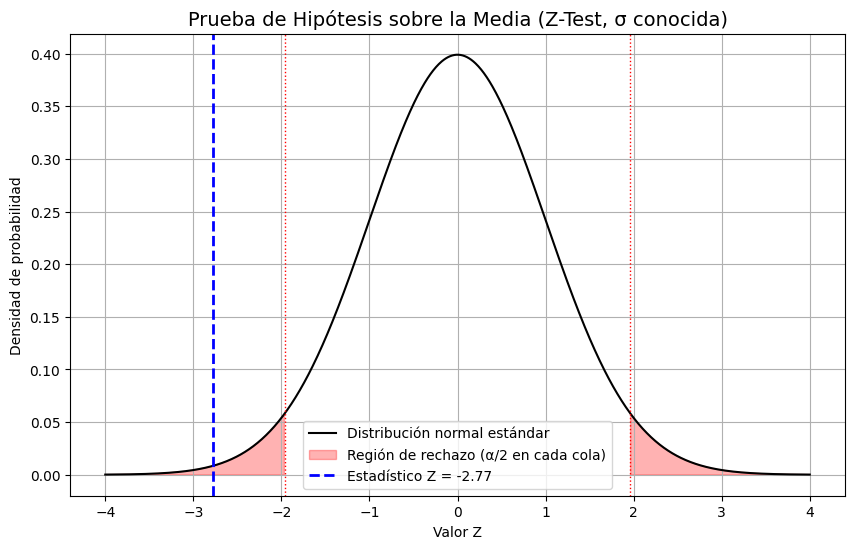

In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# ----------------------------
# Parámetros del problema
# ----------------------------
mu = 60000            # Media poblacional según el fabricante
sigma = 5000          # Desviación estándar poblacional
n = 48                # Tamaño de la muestra
x_bar = 58000         # Media muestral observada
alpha = 0.05          # Nivel de significancia

# ----------------------------
# Cálculo del estadístico Z
# ----------------------------
z = (x_bar - mu) / (sigma / np.sqrt(n))

# ----------------------------
# Cálculo de valores críticos y valor-p
# ----------------------------
z_critico = stats.norm.ppf(1 - alpha / 2)  # Prueba bilateral
p_valor = 2 * (1 - stats.norm.cdf(abs(z)))  # Valor-p bilateral

# ----------------------------
# Resultados
# ----------------------------
print("RESULTADOS DE LA PRUEBA DE HIPÓTESIS\n")
print(f"Media poblacional esperada (μ₀): {mu}")
print(f"Media muestral (x̄): {x_bar}")
print(f"Desviación estándar poblacional (σ): {sigma}")
print(f"Tamaño de muestra (n): {n}")
print(f"Nivel de significancia (α): {alpha}")
print(f"\nEstadístico Z calculado: {z:.4f}")
print(f"Valor crítico (Zα/2): ±{z_critico:.4f}")
print(f"Valor-p: {p_valor:.4f}")

# ----------------------------
# Decisión
# ----------------------------
if abs(z) > z_critico:
    print("\nDecisión: RECHAZAMOS la hipótesis nula.")
    print("Existe evidencia significativa de que la experiencia de Crosset es diferente a la del fabricante.")
else:
    print("\nDecisión: NO rechazamos la hipótesis nula.")
    print("No hay suficiente evidencia para decir que la experiencia de Crosset es diferente a la del fabricante.")

# ----------------------------
# Visualización de la región de rechazo y estadístico
# ----------------------------
z_vals = np.linspace(-4, 4, 1000)
pdf_vals = stats.norm.pdf(z_vals)

plt.figure(figsize=(10, 6))
plt.plot(z_vals, pdf_vals, label='Distribución normal estándar', color='black')

# Región de rechazo
plt.fill_between(z_vals, 0, pdf_vals,
                 where=(z_vals <= -z_critico) | (z_vals >= z_critico),
                 color='red', alpha=0.3, label='Región de rechazo (α/2 en cada cola)')

# Estadístico Z calculado
plt.axvline(z, color='blue', linestyle='--', linewidth=2, label=f'Estadístico Z = {z:.2f}')

# Añadir líneas críticas
plt.axvline(z_critico, color='red', linestyle='dotted', linewidth=1)
plt.axvline(-z_critico, color='red', linestyle='dotted', linewidth=1)

# Estética del gráfico
plt.title("Prueba de Hipótesis sobre la Media (Z-Test, σ conocida)", fontsize=14)
plt.xlabel("Valor Z")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.show()


La cadena de restaurantes MacBurger afirma que el tiempo de espera de los clientes es de 8 minutos con una desviación estándar poblacional de 1 minuto. El departamento de control de calidad halló en una muestra de 50 clientes en Warren Road MacBurger que el tiempo medio de espera era de 2.75 minutos. Con el nivel de significancia de 0.05, ¿puede concluir que el tiempo medio de espera sea menor a 3 minutos?

RESULTADOS DE LA PRUEBA DE HIPÓTESIS

Media poblacional bajo H₀ (μ₀): 3
Media muestral (x̄): 2.75
Desviación estándar poblacional (σ): 1
Tamaño de muestra (n): 50
Nivel de significancia (α): 0.05

Estadístico Z calculado: -1.7678
Valor crítico Z (α): -1.6449
Valor-p: 0.0385

Decisión: RECHAZAMOS la hipótesis nula.
Existe suficiente evidencia para decir que el tiempo medio de espera es menor a 3 minutos.


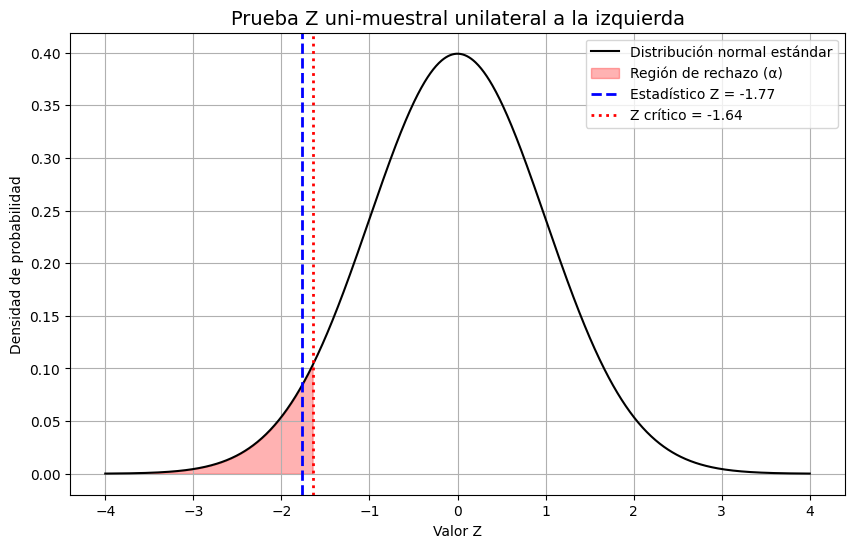

In [10]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# ----------------------------
# Parámetros del problema
# ----------------------------
mu_0 = 3       # Media poblacional según la hipótesis nula
sigma = 1      # Desviación estándar poblacional (conocida)
n = 50         # Tamaño de la muestra
x_bar = 2.75   # Media muestral observada
alpha = 0.05   # Nivel de significancia

# ----------------------------
# Cálculo del estadístico Z
# ----------------------------
z = (x_bar - mu_0) / (sigma / np.sqrt(n))

# ----------------------------
# Cálculo del valor crítico y valor-p
# ----------------------------
z_critico = stats.norm.ppf(alpha)  # Prueba unilateral a la izquierda
p_valor = stats.norm.cdf(z)        # ÁREA a la izquierda de z

# ----------------------------
# Resultados
# ----------------------------
print("RESULTADOS DE LA PRUEBA DE HIPÓTESIS\n")
print(f"Media poblacional bajo H₀ (μ₀): {mu_0}")
print(f"Media muestral (x̄): {x_bar}")
print(f"Desviación estándar poblacional (σ): {sigma}")
print(f"Tamaño de muestra (n): {n}")
print(f"Nivel de significancia (α): {alpha}")
print(f"\nEstadístico Z calculado: {z:.4f}")
print(f"Valor crítico Z (α): {z_critico:.4f}")
print(f"Valor-p: {p_valor:.4f}")

# ----------------------------
# Decisión estadística
# ----------------------------
if z < z_critico:
    print("\nDecisión: RECHAZAMOS la hipótesis nula.")
    print("Existe suficiente evidencia para decir que el tiempo medio de espera es menor a 3 minutos.")
else:
    print("\nDecisión: NO rechazamos la hipótesis nula.")
    print("No hay suficiente evidencia para afirmar que el tiempo medio de espera es menor a 3 minutos.")

# ----------------------------
# Visualización de la región de rechazo y estadístico
# ----------------------------
z_vals = np.linspace(-4, 4, 1000)
pdf_vals = stats.norm.pdf(z_vals)

plt.figure(figsize=(10, 6))
plt.plot(z_vals, pdf_vals, label='Distribución normal estándar', color='black')

# Sombrear región de rechazo (prueba unilateral izquierda)
plt.fill_between(z_vals, 0, pdf_vals, where=(z_vals < z_critico),
                 color='red', alpha=0.3, label='Región de rechazo (α)')

# Estadístico Z calculado
plt.axvline(z, color='blue', linestyle='--', linewidth=2, label=f'Estadístico Z = {z:.2f}')

# Línea de valor crítico
plt.axvline(z_critico, color='red', linestyle='dotted', linewidth=2, label=f'Z crítico = {z_critico:.2f}')

plt.title("Prueba Z uni-muestral unilateral a la izquierda", fontsize=14)
plt.xlabel("Valor Z")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.show()


En el momento en que fue contratada como mesera en el Grumney Family Restaurant, a Beth Brigden le dijeron: “Puedes ganar en promedio más de $\$80$ al día en propinas.” Suponga que la desviación estándar de la distribución de población es de $\$3.24.$ Los primeros 35 días de trabajar en el restaurante, la suma media de sus propinas fue de $\$84.85.$ Con el nivel de significancia de 0.01, ¿la señorita Brigden puede concluir que gana un promedio de más de $\$80$ en propinas?

RESULTADOS DE LA PRUEBA DE HIPÓTESIS

Media bajo H₀ (μ₀): 80
Media muestral (x̄): 84.85
Desviación estándar poblacional (σ): 3.24
Tamaño de la muestra (n): 35
Nivel de significancia (α): 0.01

Estadístico Z calculado: 8.8559
Valor crítico Z (α): 2.3263
Valor-p: 0.000000

Decisión: RECHAZAMOS la hipótesis nula.
Conclusión: Existe evidencia suficiente para afirmar que Beth gana en promedio más de $80 en propinas.


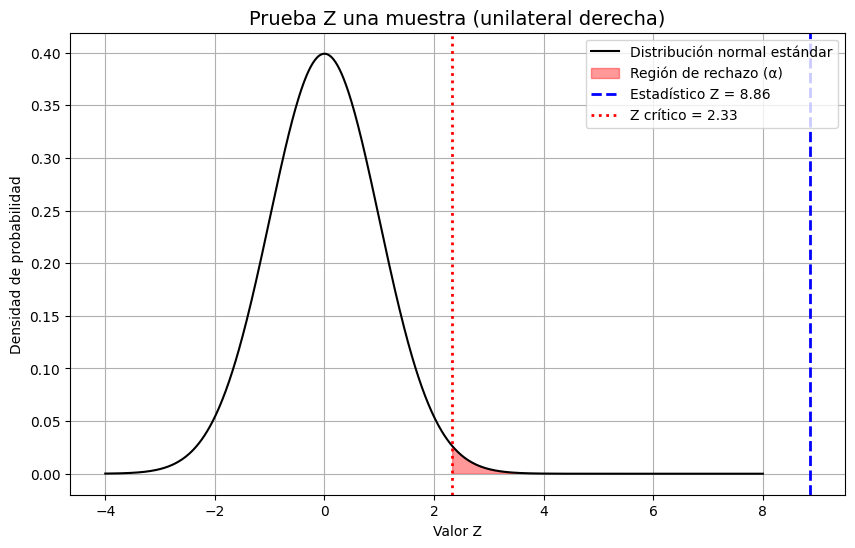

In [11]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# ----------------------------
# Parámetros del problema
# ----------------------------
mu_0 = 80         # Media poblacional bajo H₀
sigma = 3.24      # Desviación estándar poblacional
n = 35            # Tamaño de la muestra
x_bar = 84.85     # Media muestral observada
alpha = 0.01      # Nivel de significancia

# ----------------------------
# Cálculo del estadístico Z
# ----------------------------
z = (x_bar - mu_0) / (sigma / np.sqrt(n))

# ----------------------------
# Cálculo del valor crítico y valor-p (prueba unilateral derecha)
# ----------------------------
z_critico = stats.norm.ppf(1 - alpha)
p_valor = 1 - stats.norm.cdf(z)

# ----------------------------
# Resultados en consola
# ----------------------------
print("RESULTADOS DE LA PRUEBA DE HIPÓTESIS\n")
print(f"Media bajo H₀ (μ₀): {mu_0}")
print(f"Media muestral (x̄): {x_bar}")
print(f"Desviación estándar poblacional (σ): {sigma}")
print(f"Tamaño de la muestra (n): {n}")
print(f"Nivel de significancia (α): {alpha}")
print(f"\nEstadístico Z calculado: {z:.4f}")
print(f"Valor crítico Z (α): {z_critico:.4f}")
print(f"Valor-p: {p_valor:.6f}")

# ----------------------------
# Decisión estadística
# ----------------------------
if z > z_critico:
    print("\nDecisión: RECHAZAMOS la hipótesis nula.")
    print("Conclusión: Existe evidencia suficiente para afirmar que Beth gana en promedio más de $80 en propinas.")
else:
    print("\nDecisión: NO rechazamos la hipótesis nula.")
    print("Conclusión: No hay suficiente evidencia para afirmar que Beth gana en promedio más de $80 en propinas.")

# ----------------------------
# Visualización de la región de rechazo y estadístico Z
# ----------------------------
z_vals = np.linspace(-4, 8, 1000)
pdf_vals = stats.norm.pdf(z_vals)

plt.figure(figsize=(10, 6))
plt.plot(z_vals, pdf_vals, color='black', label='Distribución normal estándar')

# Sombrear la región de rechazo (únicamente a la derecha)
plt.fill_between(z_vals, 0, pdf_vals, where=(z_vals > z_critico),
                 color='red', alpha=0.4, label='Región de rechazo (α)')

# Línea para el estadístico Z calculado
plt.axvline(z, color='blue', linestyle='--', linewidth=2, label=f'Estadístico Z = {z:.2f}')

# Línea de valor crítico
plt.axvline(z_critico, color='red', linestyle='dotted', linewidth=2, label=f'Z crítico = {z_critico:.2f}')

# Estética
plt.title("Prueba Z una muestra (unilateral derecha)", fontsize=14)
plt.xlabel("Valor Z")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.show()


Una máquina está diseñada para fabricar barras de aluminio con una longitud promedio de 43 cm. Para verificar si la máquina mantiene correctamente la longitud especificada, se tomó una muestra de 12 barras, obteniendo las siguientes mediciones (en cm): 42, 39, 42, 45, 43, 40, 39, 41, 40, 42, 43, 42.
¿Existe evidencia suficiente, con un nivel de significancia de 0,05, para afirmar que la media de las longitudes de las barras producidas es diferente a 43 cm?

RESULTADOS DE LA PRUEBA T DE UNA MUESTRA

Media muestral (x̄): 41.50
Desviación estándar muestral (s): 1.78
Tamaño de la muestra (n): 12
Media bajo H₀ (μ₀): 43
Nivel de significancia (α): 0.02

Estadístico t manual: -2.9130
Estadístico t scipy: -2.9130
Valor crítico t (α/2): ±2.7181
Valor-p (scipy, bilateral): 0.0141

Decisión: RECHAZAMOS la hipótesis nula.
Conclusión: Hay evidencia estadística de que la longitud media es diferente de 43.


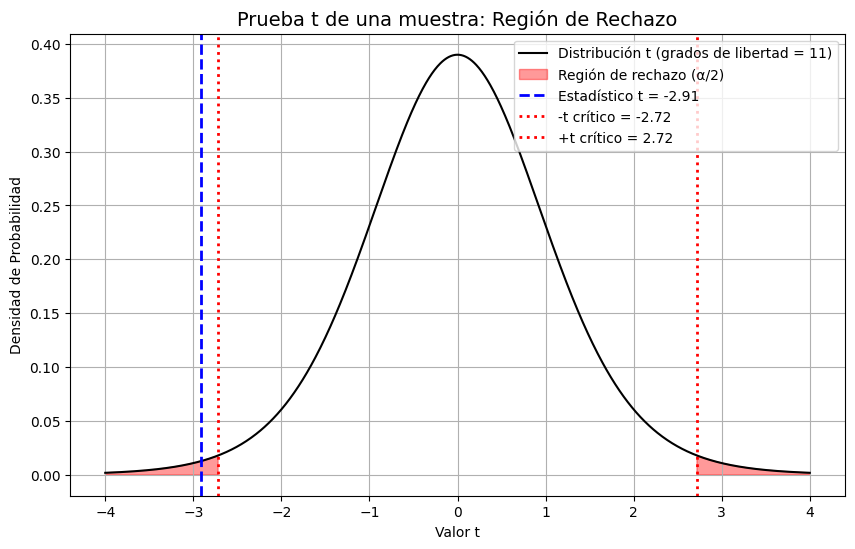

In [12]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# ----------------------------
# Datos y Parámetros del Problema
# ----------------------------
muestra = [42, 39, 42, 45, 43, 40, 39, 41, 40, 42, 43, 42]
mu_0 = 43           # Media poblacional según H₀
alpha = 0.02        # Nivel de significancia

# ----------------------------
# Estadísticos muestrales
# ----------------------------
n = len(muestra)
x_bar = np.mean(muestra)
s = np.std(muestra, ddof=1)

# ----------------------------
# Cálculo manual del estadístico t
# ----------------------------
t = (x_bar - mu_0) / (s / np.sqrt(n))

# ----------------------------
# Prueba t con scipy (verificación)
# ----------------------------
t_stat, p_valor = stats.ttest_1samp(muestra, mu_0)
# p-valor es dos colas; para comparación bilateral no hay que modificarlo

# Valor crítico para prueba bilateral
t_critico = stats.t.ppf(1 - alpha/2, df=n-1)

# ----------------------------
# Despliegue de resultados
# ----------------------------
print("RESULTADOS DE LA PRUEBA T DE UNA MUESTRA\n")
print(f"Media muestral (x̄): {x_bar:.2f}")
print(f"Desviación estándar muestral (s): {s:.2f}")
print(f"Tamaño de la muestra (n): {n}")
print(f"Media bajo H₀ (μ₀): {mu_0}")
print(f"Nivel de significancia (α): {alpha}")
print(f"\nEstadístico t manual: {t:.4f}")
print(f"Estadístico t scipy: {t_stat:.4f}")
print(f"Valor crítico t (α/2): ±{t_critico:.4f}")
print(f"Valor-p (scipy, bilateral): {p_valor:.4f}")

# Decisión estadística (prueba bilateral)
if abs(t) > t_critico:
    print("\nDecisión: RECHAZAMOS la hipótesis nula.")
    print("Conclusión: Hay evidencia estadística de que la longitud media es diferente de 43.")
else:
    print("\nDecisión: NO rechazamos la hipótesis nula.")
    print("Conclusión: No hay evidencia suficiente para concluir que la longitud media ha cambiado.")

# ----------------------------
# Visualización de la región de rechazo y estadístico t
# ----------------------------
t_vals = np.linspace(-4, 4, 1000)
pdf_vals = stats.t.pdf(t_vals, df=n-1)

plt.figure(figsize=(10, 6))
plt.plot(t_vals, pdf_vals, label=f"Distribución t (grados de libertad = {n-1})", color='black')

# Sombrear las regiones de rechazo
plt.fill_between(t_vals, 0, pdf_vals, where=(t_vals < -t_critico) | (t_vals > t_critico),
                 color='red', alpha=0.4, label='Región de rechazo (α/2)')

# Línea del estadístico t calculado
plt.axvline(t, color='blue', linestyle='--', linewidth=2, label=f'Estadístico t = {t:.2f}')

# Líneas de valores críticos
plt.axvline(-t_critico, color='red', linestyle='dotted', linewidth=2, label=f'-t crítico = {-t_critico:.2f}')
plt.axvline(t_critico, color='red', linestyle='dotted', linewidth=2, label=f'+t crítico = {t_critico:.2f}')

plt.title("Prueba t de una muestra: Región de Rechazo", fontsize=14)
plt.xlabel("Valor t")
plt.ylabel("Densidad de Probabilidad")
plt.legend()
plt.grid(True)
plt.show()


# Pruebas de hipótesis con proporciones

**Objetivo:**  
Evaluar si la **proporción observada en una muestra** (\(\hat{p}\)) es significativamente distinta de una proporción teórica (\(p_0\)) especificada en la hipótesis nula. Las hipótesis pueden formularse para detectar diferencias en ambas direcciones (bilateral: \(H_1: p \neq p_0\)) o en una sola dirección (unilateral: \(H_1: p > p_0\) o \(H_1: p < p_0\)) [3][5][6].

---

**Hipótesis:**

- **Nula:** \(H_0: p = p_0\)
- **Alternativa:** Dependiendo del contexto,
  - **Bilateral**: \(H_1: p \neq p_0\)
  - **Unilateral derecha**: \(H_1: p > p_0\)
  - **Unilateral izquierda**: \(H_1: p < p_0\)

---

**Estadístico de prueba:**  
Para muestras grandes (\(n > 30\)), se utiliza la aproximación normal a la binomial para el cálculo del estadístico \(z\):

\[
z = \frac{\,\hat{p} - p_0\,}{\sqrt{\dfrac{p_0(1-p_0)}{n}}}
\]

donde:
- \(\hat{p} = \frac{x}{n}\) es la proporción muestral (\(x\): número de éxitos, \(n\): tamaño de muestra) [3][6],
- \(p_0\) es la proporción bajo la hipótesis nula,
- Se cumplen los supuestos de normalidad si \(n p_0\) y \(n(1-p_0)\) son mayores o iguales a 10.

---

**Procedimiento y decisión:**  
1. **Calcular \(z\)** con la fórmula anterior.
2. **Obtener el valor crítico** para el nivel de significancia (\(\alpha\)) correspondiente (una o dos colas).
3. **Comparar el estadístico \(z\)** con el valor crítico o calcular el **p-valor**.
   - Si el p-valor < \(\alpha\), **se rechaza \(H_0\)**.
   - Si el p-valor ≥ \(\alpha\), **no se rechaza \(H_0\)** [6][7].

---

> La interpretación de la prueba permite afirmar, con el nivel de confianza seleccionado, si la proporción de la población difiere o no de la proporción teórica considerada


Supongamos que queremos comprobar si la proporción de éxitos en una muestra es diferente a 0.5. En una muestra de 100 ensayos, se obtienen 60 éxitos (\( \hat{p} = 0.60 \)). 

Prueba Z para una proporción

Proporción muestral (p̂): 0.60
Estadístico z calculado : 2.0000
Valor crítico (α/2)     : ±1.9600
Valor-p (manual)        : 0.0455
Estadístico z (statsmodels): 2.0412 | Valor-p (statsmodels): 0.0412

Decisión: Rechazamos H₀. Hay evidencia de que la proporción difiere de 0.5.


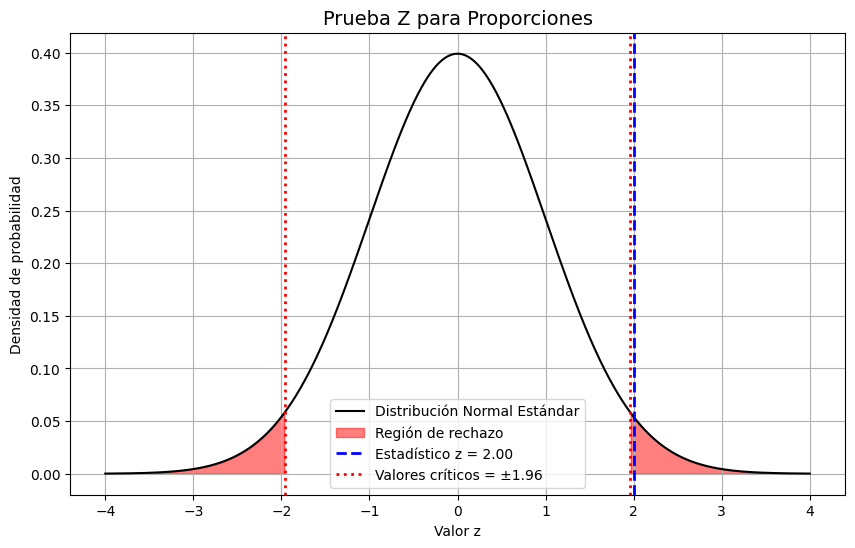

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest

# Parámetros del problema
n = 100        # Tamaño de la muestra
x = 60         # Número de éxitos en la muestra
p0 = 0.5       # Proporción bajo H0
alpha = 0.05   # Nivel de significancia

# Proporción muestral
p_hat = x / n

# Cálculo del estadístico z manualmente
z = (p_hat - p0) / np.sqrt(p0 * (1 - p0) / n)

# Valores críticos para una prueba bilateral
z_critico = norm.ppf(1 - alpha/2)

# p-valor
p_valor = 2 * (1 - norm.cdf(abs(z)))

# Resultados con statsmodels (verificación)
stat, p_value_sm = proportions_ztest(count=x, nobs=n, value=p0, alternative='two-sided')

# Mostrar resultados
print("Prueba Z para una proporción\n")
print(f"Proporción muestral (p̂): {p_hat:.2f}")
print(f"Estadístico z calculado : {z:.4f}")
print(f"Valor crítico (α/2)     : ±{z_critico:.4f}")
print(f"Valor-p (manual)        : {p_valor:.4f}")
print(f"Estadístico z (statsmodels): {stat:.4f} | Valor-p (statsmodels): {p_value_sm:.4f}")

if abs(z) > z_critico:
    print("\nDecisión: Rechazamos H₀. Hay evidencia de que la proporción difiere de 0.5.")
else:
    print("\nDecisión: No se rechaza H₀. No hay evidencia suficiente para afirmar que la proporción difiere de 0.5.")

# Visualización de la región de rechazo
z_vals = np.linspace(-4, 4, 1000)
pdf_vals = norm.pdf(z_vals)

plt.figure(figsize=(10,6))
plt.plot(z_vals, pdf_vals, color='black', label='Distribución Normal Estándar')

# Sombrear regiones de rechazo (dos colas)
plt.fill_between(z_vals, 0, pdf_vals, where=(z_vals <= -z_critico), color='red', alpha=0.5, label='Región de rechazo')
plt.fill_between(z_vals, 0, pdf_vals, where=(z_vals >=  z_critico), color='red', alpha=0.5)

# Línea del valor z calculado
plt.axvline(z, color='blue', linestyle='--', linewidth=2, label=f'Estadístico z = {z:.2f}')

# Líneas de valores críticos
plt.axvline(-z_critico, color='red', linestyle='dotted', linewidth=2, label=f'Valores críticos = ±{z_critico:.2f}')
plt.axvline(z_critico, color='red', linestyle='dotted', linewidth=2)

# Títulos y leyenda
plt.title('Prueba Z para Proporciones', fontsize=14)
plt.xlabel('Valor z')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()



Se lanza una moneda 100 veces. La hipótesis es que la moneda es justa (proporción teórica \(p_0 = 0.5\)). En la muestra se obtienen 60 caras, por lo que la proporción observada es \( \hat{p} = 0.60 \).

Prueba Z para una proporción (¿Moneda justa?)

Proporción muestral (p̂): 0.60
Estadístico z (manual):    2.0000
Valor crítico z±:         ±1.9600
p-valor (manual):          0.0455
Estadístico z (statsmodels): 2.0412
p-valor (statsmodels):     0.0412

Conclusión: Rechazamos H₀. Hay evidencia de que la moneda NO es justa.


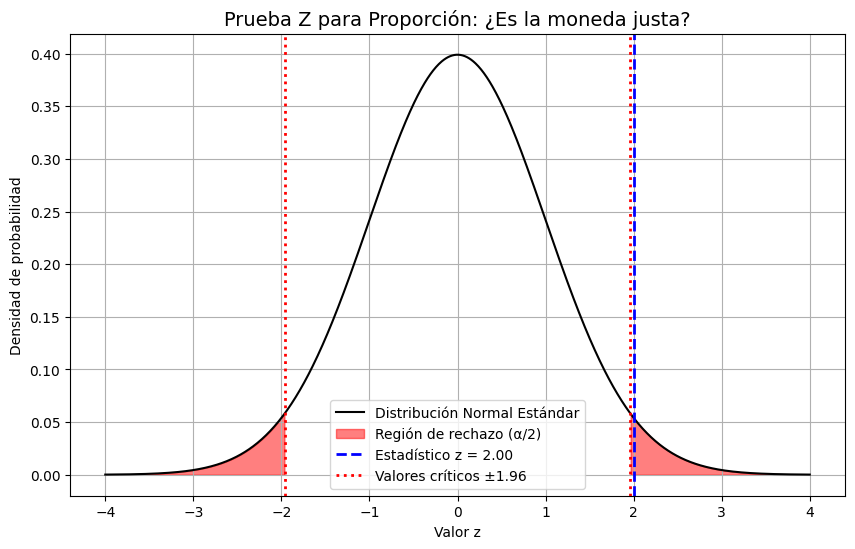

In [14]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros del problema
n = 100      # lanzamientos
x = 60       # caras obtenidas
p0 = 0.5     # proporción teórica bajo H0 (moneda justa)
alpha = 0.05 # nivel de significancia

# Proporción muestral observada
p_hat = x / n

# Estadístico z manual
z = (p_hat - p0) / np.sqrt(p0 * (1 - p0) / n)

# Valores críticos para prueba bilateral
z_critico = norm.ppf(1 - alpha/2)

# Valor-p bilateral manual
p_valor = 2 * (1 - norm.cdf(abs(z)))

# Con statsmodels (para verificar)
stat, p_sm = proportions_ztest(count=x, nobs=n, value=p0, alternative='two-sided')

# Resultados
print("Prueba Z para una proporción (¿Moneda justa?)\n")
print(f"Proporción muestral (p̂): {p_hat:.2f}")
print(f"Estadístico z (manual):    {z:.4f}")
print(f"Valor crítico z±:         ±{z_critico:.4f}")
print(f"p-valor (manual):          {p_valor:.4f}")
print(f"Estadístico z (statsmodels): {stat:.4f}")
print(f"p-valor (statsmodels):     {p_sm:.4f}")

if abs(z) > z_critico:
    print("\nConclusión: Rechazamos H₀. Hay evidencia de que la moneda NO es justa.")
else:
    print("\nConclusión: No se rechaza H₀. No hay evidencia suficiente para decir que la moneda NO es justa.")

# Gráfica de la región de rechazo
z_vals = np.linspace(-4, 4, 1000)
pdf_vals = norm.pdf(z_vals)

plt.figure(figsize=(10,6))
plt.plot(z_vals, pdf_vals, color='black', label='Distribución Normal Estándar')

# Sombrear regiones de rechazo bilateral
plt.fill_between(z_vals, 0, pdf_vals, where=(z_vals <= -z_critico), color='red', alpha=0.5, label='Región de rechazo (α/2)')
plt.fill_between(z_vals, 0, pdf_vals, where=(z_vals >=  z_critico), color='red', alpha=0.5)

# Línea estadístico z
plt.axvline(z, color='blue', linestyle='--', linewidth=2, label=f'Estadístico z = {z:.2f}')

# Líneas valores críticos
plt.axvline(-z_critico, color='red', linestyle='dotted', linewidth=2, label=f'Valores críticos ±{z_critico:.2f}')
plt.axvline(z_critico,  color='red', linestyle='dotted', linewidth=2)

plt.title('Prueba Z para Proporción: ¿Es la moneda justa?', fontsize=14)
plt.xlabel('Valor z')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()


Una empresa de salud afirma que la tasa de éxito de un nuevo tratamiento es del 70% (\(p_0 = 0.70\)). Se evalúa este tratamiento en 64 pacientes, obteniéndose 50 éxitos.

Prueba Z para proporción (Unilateral Derecha)
Proporción muestral (p̂):     0.7812
Estadístico z calculado:      1.4184
Valor crítico z (α = 0.05):   1.6449
Valor-p (manual):             0.0780
Valor-p (statsmodels):        0.0579

Decisión: No se rechaza H₀. No hay evidencia de que la tasa de éxito sea mayor al 70%.


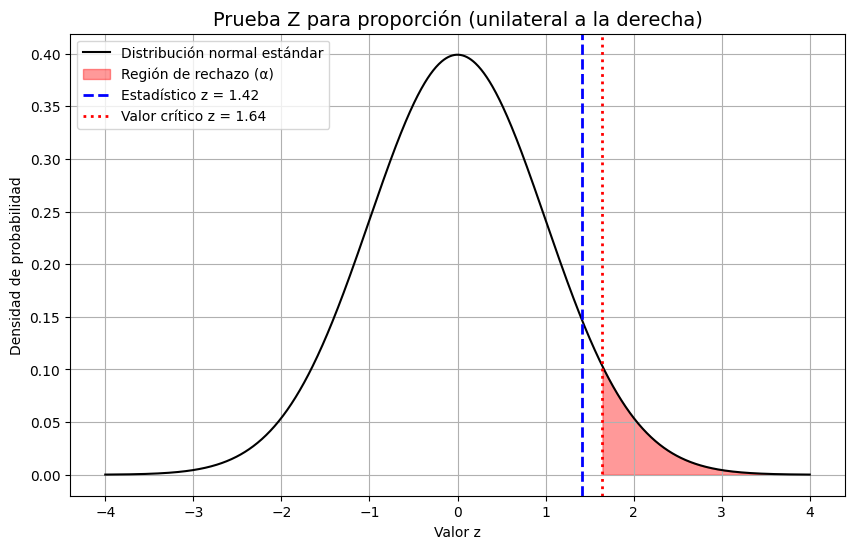

In [15]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros
n = 64            # Número de observaciones
x = 50            # Éxitos
p0 = 0.70         # Proporción teórica bajo H₀
alpha = 0.05      # Nivel de significancia

# Proporción muestral
p_hat = x / n

# Estadístico z (manual)
z = (p_hat - p0) / np.sqrt(p0 * (1 - p0) / n)

# Valor crítico para prueba unilateral a la derecha
z_critico = norm.ppf(1 - alpha)

# Valor-p (unilateral derecha)
p_valor = 1 - norm.cdf(z)

# Verificación con statsmodels
stat, p_valor_sm = proportions_ztest(count=x, nobs=n, value=p0, alternative='larger')

# Resultados
print("Prueba Z para proporción (Unilateral Derecha)")
print(f"Proporción muestral (p̂):     {p_hat:.4f}")
print(f"Estadístico z calculado:      {z:.4f}")
print(f"Valor crítico z (α = 0.05):   {z_critico:.4f}")
print(f"Valor-p (manual):             {p_valor:.4f}")
print(f"Valor-p (statsmodels):        {p_valor_sm:.4f}")

# Decisión
if z > z_critico:
    print("\nDecisión: Rechazamos H₀. Hay evidencia de que la tasa de éxito es mayor al 70%.")
else:
    print("\nDecisión: No se rechaza H₀. No hay evidencia de que la tasa de éxito sea mayor al 70%.")

# =============================
# Visualización de la prueba Z
# =============================
z_vals = np.linspace(-4, 4, 1000)
pdf_vals = norm.pdf(z_vals)

plt.figure(figsize=(10, 6))
plt.plot(z_vals, pdf_vals, label='Distribución normal estándar', color='black')

# Sombrear región de rechazo (cola derecha)
plt.fill_between(z_vals, 0, pdf_vals, where=(z_vals >= z_critico), color='red', alpha=0.4, label="Región de rechazo (α)")

# Línea del est. z calculado
plt.axvline(z, color='blue', linestyle='--', linewidth=2, label=f'Estadístico z = {z:.2f}')

# Línea del valor crítico
plt.axvline(z_critico, color='red', linestyle='dotted', linewidth=2, label=f'Valor crítico z = {z_critico:.2f}')

# Etiquetas y estética
plt.title("Prueba Z para proporción (unilateral a la derecha)", fontsize=14)
plt.xlabel("Valor z")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.show()


En un proceso de reclutamiento se afirma que al menos el 80% de los candidatos cumplen con los requisitos (\(p_0 = 0.80\)). Se evalúa a 100 candidatos y 70 cumplen con los requisitos. Haz una prueba unilateral a izquierda.

Prueba Z para proporción (Unilateral Izquierda)
Proporción muestral (p̂):        0.7000
Estadístico z calculado:         -2.5000
Valor crítico z (α = 0.05):      -1.6449
Valor-p (calculado):             0.0062
Valor-p (statsmodels):           0.0145

Decisión: RECHAZAMOS H₀.
Conclusión: La proporción de candidatos que cumplen con los requisitos es MENOR al 80%.


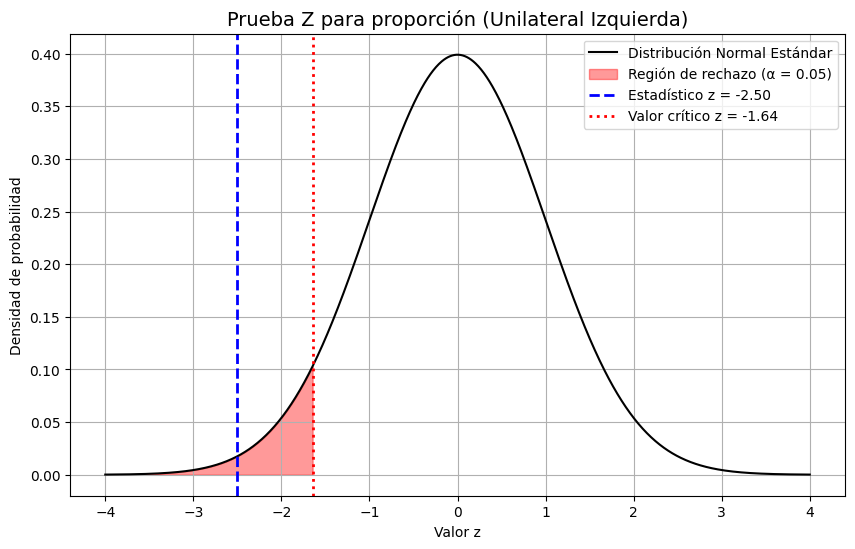

In [16]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros del problema
n = 100          # Total de candidatos evaluados
x = 70           # Número de candidatos que cumplieron los requisitos
p0 = 0.80        # Proporción teórica bajo H0
alpha = 0.05     # Nivel de significancia

# Proporción muestral
p_hat = x / n

# Estadístico z calculado (manualmente)
z = (p_hat - p0) / np.sqrt(p0 * (1 - p0) / n)

# Valor crítico para prueba unilateral a la izquierda
z_critico = norm.ppf(alpha)

# Valor-p unilateral izquierda
p_valor = norm.cdf(z)

# Verificación con statsmodels
stat, p_valor_sm = proportions_ztest(count=x, nobs=n, value=p0, alternative='smaller')

# ---------------------
# Resultados numéricos
# ---------------------
print("Prueba Z para proporción (Unilateral Izquierda)")
print(f"Proporción muestral (p̂):        {p_hat:.4f}")
print(f"Estadístico z calculado:         {z:.4f}")
print(f"Valor crítico z (α = 0.05):      {z_critico:.4f}")
print(f"Valor-p (calculado):             {p_valor:.4f}")
print(f"Valor-p (statsmodels):           {p_valor_sm:.4f}")

# ---------------------
# Decisión estadística
# ---------------------
if z < z_critico:
    print("\nDecisión: RECHAZAMOS H₀.")
    print("Conclusión: La proporción de candidatos que cumplen con los requisitos es MENOR al 80%.")
else:
    print("\nDecisión: NO se rechaza H₀.")
    print("Conclusión: No hay evidencia suficiente para afirmar que la proporción es menor al 80%.")

# ---------------------
# Visualización gráfica
# ---------------------
z_vals = np.linspace(-4, 4, 1000)
pdf_vals = norm.pdf(z_vals)

plt.figure(figsize=(10, 6))
plt.plot(z_vals, pdf_vals, label='Distribución Normal Estándar', color='black')

# Región de rechazo (izquierda)
plt.fill_between(z_vals, 0, pdf_vals, where=(z_vals <= z_critico),
                 color='red', alpha=0.4, label='Región de rechazo (α = 0.05)')

# Línea del estadístico z calculado
plt.axvline(z, color='blue', linestyle='--', linewidth=2, label=f'Estadístico z = {z:.2f}')

# Línea crítica
plt.axvline(z_critico, color='red', linestyle='dotted', linewidth=2, label=f'Valor crítico z = {z_critico:.2f}')

# Estética y título
plt.title('Prueba Z para proporción (Unilateral Izquierda)', fontsize=14)
plt.xlabel('Valor z')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()
